In [3]:
# Read in data
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV
%matplotlib inline

train_features = pd.read_csv('../../../data/final_data/train_features_raw.csv')
train_labels = pd.read_csv('../../../data/final_data/train_labels.csv')

train_features.head()

Pclass  Sex  Age_clean  SibSp  Parch     Fare  Cabin  Embarked
0       2    1       62.0      0      0  10.5000    147         2
1       3    1        8.0      4      1  29.1250    147         1
2       3    1       32.0      0      0  56.4958    147         2
3       3    0       20.0      1      0   9.8250    147         2
4       2    0       28.0      0      0  13.0000    147         2

In [4]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [18]:
# Conduct search for best params while running cross-validation (GridSearchCV)
rf = LogisticRegression(max_iter=5000)
parameters = {
    'C' : [i for i in range(1, 10)] 
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 3}

0.798 (+/-0.091) for {'C': 1}
0.8 (+/-0.096) for {'C': 2}
0.802 (+/-0.099) for {'C': 3}
0.802 (+/-0.093) for {'C': 4}
0.8 (+/-0.097) for {'C': 5}
0.8 (+/-0.097) for {'C': 6}
0.8 (+/-0.097) for {'C': 7}
0.8 (+/-0.097) for {'C': 8}
0.8 (+/-0.097) for {'C': 9}


In [19]:
mdl  = LogisticRegression(max_iter = 1000)
mdl.fit(train_features, train_labels.values.ravel())

LogisticRegression(max_iter=1000)

(0, 50)

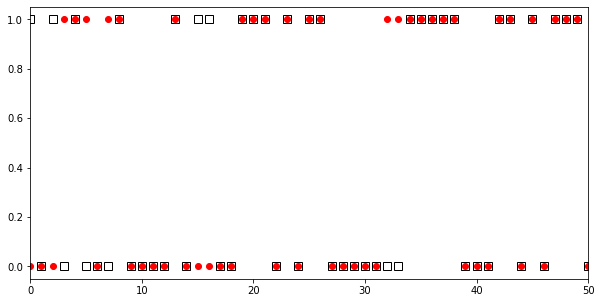

In [28]:
plt.figure(figsize=(10,5))
plt.plot(mdl.predict(train_features),"ro")
plt.plot(train_labels,"ks",mfc='none',ms="8")
plt.xlim(0,50)